In [32]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import sys

# Add parent directory to Python path
sys.path.append(os.path.abspath(".."))

from crop import crop_name


In [33]:
# Read image
img = cv2.imread(r"../../data/output/1.png")

In [34]:
crop = crop_name(img)

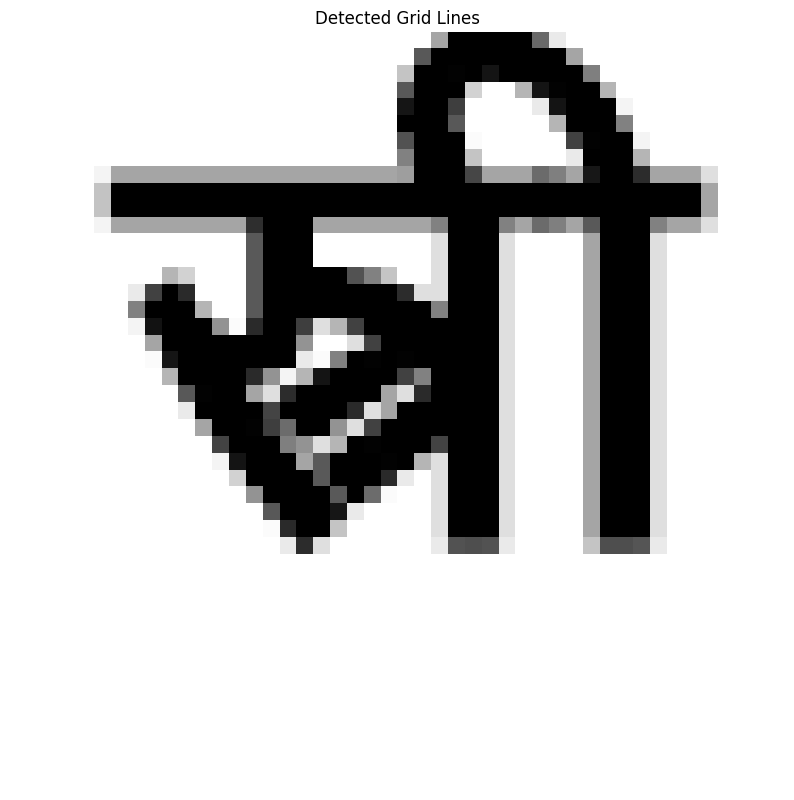

In [35]:
# -------------------------
# DISPLAY USING MATPLOTLIB
# -------------------------
plt.figure(figsize=(10, 14))
plt.imshow(crop, cmap="gray")
plt.title("Detected Grid Lines")
plt.axis("off")

# This blocks execution until you close the window
plt.show()

In [ ]:
# -------------------------
# HORIZONTAL LINE DETECTION
# -------------------------
h_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (w // 12, 1))
horizontal = cv2.morphologyEx(bw, cv2.MORPH_OPEN, h_kernel)

# Repair broken lines
horizontal = cv2.dilate(horizontal, np.ones((3, 15), np.uint8), iterations=1)

num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(horizontal, 8)
clean_horizontal = np.zeros_like(horizontal)

for i in range(1, num_labels):
    width = stats[i, cv2.CC_STAT_WIDTH]
    area = stats[i, cv2.CC_STAT_AREA]

    if width > w * 0.30 and area > 800:
        clean_horizontal[labels == i] = 255

# Remove bottom-most horizontal line (footer)
ys = np.where(clean_horizontal.sum(axis=1) > 0)[0]
if len(ys) > 0 and ys[-1] > h * 0.92:
    y = ys[-1]
    clean_horizontal[max(0, y-3):min(h, y+3), :] = 0

In [ ]:
# -------------------------
# DISPLAY USING MATPLOTLIB
# -------------------------
plt.figure(figsize=(10, 14))
plt.imshow(clean_horizontal, cmap="gray")
plt.title("Detected Grid Lines")
plt.axis("off")

# This blocks execution until you close the window
plt.show()

In [ ]:
# -------------------------
# VERTICAL LINE DETECTION
# -------------------------
v_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, h // 12))
vertical = cv2.morphologyEx(bw, cv2.MORPH_OPEN, v_kernel)

# Repair broken lines
clean_vertical = cv2.dilate(vertical, np.ones((15, 3), np.uint8), iterations=1)

num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(vertical, 8)

for i in range(1, num_labels):
    height = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]

    if height > h * 0.25 and area > 800:
        clean_vertical[labels == i] = 255

In [ ]:
# -------------------------
# DISPLAY USING MATPLOTLIB
# -------------------------
plt.figure(figsize=(10, 14))
plt.imshow(clean_vertical, cmap="gray")
plt.title("Detected Grid Lines")
plt.axis("off")

# This blocks execution until you close the window
plt.show()

In [ ]:
# -------------------------
# FINAL GRID
# -------------------------
grid = cv2.bitwise_or(clean_horizontal, clean_vertical)


In [ ]:
# -------------------------
# DISPLAY USING MATPLOTLIB
# -------------------------
plt.figure(figsize=(10, 14))
plt.imshow(grid, cmap="gray")
plt.title("Detected Grid Lines")
plt.axis("off")

# This blocks execution until you close the window
plt.show()